# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Teoría de Colas (4a. Parte)

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Sistemas de fila de espera

Nos interesa modelar sistemas de *eventos discretos* en los cuales:

* Hay un arribo de "trabajos" o "clientes" a cierta tasa $\lambda$ de manera estocástica.
* Los clientes son puestos en una o varias *filas de espera* (colas).
* Cada trabajo es atendido por uno o múltiples *servidores* a cierta *tasa*.
* Al terminar su servicio, el trabajo deja el sistema.

### Diagrama

![Sistema](images/sistema.png "Sistema")

## Sistemas de colas más generales

En general, si los procesos de arribos o de servicios no son Markovianos (exponenciales), el análisis de una cola es mucho más complejo, ya que no responde a una cadena de Markov.

Es posible igual obtener algunos teoremas para distribuciones generales. Veremos dos resultados:

1. La Ley de Little que vincula ocupación y retardo medios.

2. La fórmula de Pollaczek-Khinchine que evalúa el retardo de la cola $M/G/1-FIFO$.

## Ley de Little

Consideremos un sistema que opera en régimen, con una tasa de arribos $\lambda$ (no necesariamente Poisson). El sistema tiene:

* Una ocupación $X(t)$ a lo largo del tiempo, y se verifica que:

$$\bar{X} = E[X(t)] = \lim_{T\to\infty} \int_0^T X(t)dt.$$

* Cada cliente que pasa por el sistema tiene un tiempo de arribo $T_k$ y uno de partida $T'_k$. Su retardo es $W_k=T'_k-T_k$. Podemos definir el *retardo medio* como:

$$\bar{W} = \lim_{n\to\infty} \sum_{k=1}^n W_k.$$

> **Teorema** (Ley de Little)
>
> Se cumple entonces que:
>
> $$\bar{X} = \lambda \bar{W}.$$

### Demostración

La demostración se basa en la siguiente observación. Sea $A(t)$ el proceso de arribos y $D(t)$ el proceso de partidas, y sea $T$ un tiempo en el cual el sistema está vacío, entonces:

![Ley de Little](images/little.png)

Concluimos entonces que:

$$\frac{1}{T} \int_0^T X(t)dt = \frac{1}{T} \sum_{k=0}^{A(T)} W_k = \frac{A(T)}{T} \frac{1}{A(T)} \sum_{k=0}^{A(T)} W_k.$$

Tomemos límite ahora cuando $T\to \infty$ sobre una sucesión de tiempos en que el sistema está vacío (esto está garantizado por la estabilidad), entonces:

* $\lim_{T\to\infty} \frac{1}{T}\int_0^T X(t)dt = \bar{X}$ por definición.

* $\lim_{T\to\infty} A(T)/T = \lambda$, la tasa de arribos.

* Como $\lambda>0$, $A(T)\to \infty$, por lo tanto:
$$\frac{1}{A(T)} \sum_{k=0}^{A(T)} W_k \to_{T\to\infty} \bar{W},$$
ya que es el promedio de cada vez más y más retardos.

Sustituyendo los límites anteriores se obtiene la igualdad deseada.

**Nota:** La demostración anterior asume un sistema FIFO pero se puede generalizar.


### Ejemplos



**Ejemplo 1:** 

Retomemos la cola M/M/1 con tasa de arribos $\lambda$, tasa de servicios $\mu$ y carga $\rho=\lambda/\mu<1$. En ese caso:

$$\bar{X} = \frac{\rho}{1-\rho} \Rightarrow \bar{W} = \frac{1}{\lambda}\bar{X} = \frac{1/\mu}{1-\lambda/\mu} = \frac{1}{\mu-\lambda}.$$

tal como habíamos deducido previamente.

**Ejemplo 2:**

Si le aplicamos la Ley de Little *solo al servidor* (es decir, consideramos la frontera del sistema el servidor, y los arribos provienen de la cola), entonces:

 * El retardo medio es simplemente el tiempo medio de servicio, $1/\mu$.
 * $X=1$ si el servidor está trabajando y $X=0$ si no.
 * Si la cola es estable, la tasa de salida debe ser igual a la de entrada, por consiguiente $\lambda$.
 
Aplicando la Ley de Little nos queda:

$$\bar{W} = \frac{1}{\mu} \Rightarrow \bar{X} = \lambda\bar{W} = \rho.$$

¿Qué es $\bar{X}$ en este caso? Como el servidor solo puede tener $0$ o $1$ clientes, $\bar{X} = P(X=1)$, es decir, la proporción de tiempo que el servidor está activo.

**Nota:** En este ejemplo, ¡no usamos para nada que los tiempos eran exponenciales! Es decir esta regla es general de todas las colas de un servidor (cola $G/G/1$). En particular muestra que $\rho<1$ es una condición necesaria de estabilidad.

**Ejemplo 3:**

Consideremos nuevamente la cola $M/M/1$, sabemos que en estado estacionario $P(X=k)=(1-\rho)\rho^k$. Sea $Q(t)$ la cantidad de clientes en cola, observemos que:

$$Q(t) = X(t) - 1 \quad \text{si } X(t)>1$$

y si no es $0$. Por lo tanto:

$$\bar{Q} = \sum_{k=2}^\infty (k-1)(1-\rho)\rho^k = (1-\rho)\rho^2 \sum_{j=1}^\infty j\rho^{j-1} = \frac{(1-\rho)\rho^2}{(1-\rho)^2} = \frac{\rho^2}{1-\rho}.$$

De donde el *retardo de cola* $\bar{V}$ es:

$$\bar{V} = \frac{1}{\lambda} \bar{Q} = \frac{\rho^2}{\lambda(1-\rho)}.$$

### El caso con bloqueos

En la demostración de la ley de Little, usamos el proceso $A(t)$, que cuenta los arribos que *efectivamente ingresaron al sistema*.

Por lo tanto, si tenemos un sistema con bloqueos, debemos *descontar* los bloqueos de la tasa de arribo:

$$\bar{X} = \bar{\lambda} \bar{W} = \lambda(1-B)\bar{W},$$

siendo $B$ la probabilidad de bloqueo.

**Nota:** otra forma de pensarlo es que los bloqueos tienen "retardo $0$" porque dejan inmediatamente el sistema.

### El caso con tasa media de arribos variable

Si la tasa de arribos $\lambda$ depende del estado del sistema, debemos considerar como tasa de arribos:

$$\bar{\lambda} = \sum_k \lambda_k \pi_k,$$

siendo $\lambda_k$ la tasa de arribos en cada estado, y $\pi_k$ la probabilidad en régimen de que el sistema esté en dicho estado.

## El sistema $M/G/1 - FIFO$

Analicemos ahora el sistema más simple posible de cola-servidor con servicios generales, la cola $M/G/1$:

> **Cola M/G/1 - FIFO:**
>
> * Llegan trabajos al sistema como un proceso de Poisson de tasa $\lambda$ (sin memoria, por eso la $M$).
>
> * Los trabajos tienen una duración $S_k$ independientes e idénticamente distribuidas, de media $E[S_k] = 1/\mu$ (trabajos genéricos $G$). Elegimos la media $1/\mu$ para permitir la comparación con el caso $M/M/1$.
>
> * Los trabajos son atendidos por un único servidor (el $1$). Mientras este atiende un trabajo, los restantes son puestos en cola y atendidos por ejemplo en orden de llegada.
>
> * El sistema no tiene límite de capacidad.

### Diagrama del sistema


![Cola M/G/1](images/colamg1.png)

**Definición:** llamaremos $R(t)$ al proceso que almacena *cuánto tiempo le queda de servicio al cliente en curso*.

El estado del sistema es la cantidad de clientes $X(t)$ **y** cuánto falta para que se vaya el actual ($R(t)$).

### Fórmula de Pollaczek - Khinchine

Consideremos el sistema $M/G/1-FIFO$ de carga $\rho$ y trabajos $\{S_n\}$ con cierta distribución genérica. Sea $\bar{V}$ el **retardo de cola** medio percibido por los clientes.

> **Teorema:** (Fórmula de Pollaczek-Khinchine)
>
> $$\bar{V} = \frac{\lambda E[S^2]}{2(1-\rho)}.$$

**Nota:** En particular, para que el retardo de cola $\bar{V}<\infty$, se requiere $E[S^2]<\infty$.

### Demostración

Para calcular el retardo de cola, conviene introducir el proceso:

$$R(t) = \text{trabajo remanente del cliente en servicio},$$

con la definición $R(t)=0$ si no hay ningún cliente.

Al llegar el cliente $k$ en tiempo $T_k$, su retardo estará compuesto por:

1. $R(T_k)$, el tiempo remanente de servicio del cliente *actualmente siendo atendido*.

2. $\sum_{j=k-Q_k}^{k-1} S_j$, siendo $Q_k$ la cantidad de clientes que observa el cliente $k$ en la cola.

de donde:

$$V_k = R(T_k) + \sum_{j=k-Q_k}^{k-1} S_j.$$

Tomando esperanza, y usando que los $Q_k$ términos de la suma son $iid$:

$$\bar{V} = E[V_k] = E[R(T_k)] + E[Q_k] E[S].$$

Por la propiedad PASTA, los arribos Poisson verán al sistema en régimen. En particular:

1. $R(T_k) = \bar{R} = E[R(t)]$ debe ser el valor medio del proceso $R$.
2. $E[Q_k] = E[Q(t)] = \bar{Q}$.

Aplicando la Ley de Little a la cola, sabemos que $\bar{Q} = \lambda \bar{V}$ de donde la igualdad queda:

$$\bar{V} = \bar{R} + \lambda E[S] \bar{V} = \bar{R} + \rho\bar{V} \Rightarrow \bar{V} = \frac{\bar{R}}{1-\rho}.$$

Por lo que calculando $\bar{R}$ podemos obtener el retardo medio de cola.

Para analizar el proceso de servicios $R(t)$, conviene realizar la siguiente observación:

![Proceso de servicios](images/mg1.png)

De la figura anterior concluimos que:

$$\bar{R} = \lim_{T\to\infty} \frac{1}{T} \int_0^T R(t)dt = \lim_{T\to\infty}\frac{A(T)}{T} \frac{1}{A(T)} \sum_{k=1}^{A(T)} \frac{S_k^2}{2}.$$

Sabemos que $A(T)/T\to\lambda$ y por la ley de grandes números, el promedio del último término debe converger a:

$$\lim_{T\to\infty} \frac{1}{A(T)} \sum_{k=1}^{A(T)} \frac{S_k^2}{2} = \frac{1}{2}E[S^2].$$

Por lo tanto $\bar{R} = \lambda \frac{1}{2} E[S^2]$. Sustituyendo obtenemos:

$$\bar{V} = \frac{\lambda E[S^2]}{2(1-\rho)}$$

que es el resultado deseado.

### Expresiones alternativas de la fórmula PK

Si aplicamos la ley de Little obtenemos:

$$\bar{Q} = \lambda\bar{V} = \frac{\lambda^2 E[S^2]}{2(1-\rho)}.$$

Conviene escribir esto último sustituyendo $E[S^2] = Var(S) + E[S]^2$ para obtener:

$$\bar{Q} = \frac{\lambda^2 (E[S]^2 + Var(S))}{2(1-\rho)} = \frac{\lambda^2 E[S]^2}{2(1-\rho)}\left(1+\frac{Var(S)}{E[S]^2}\right).$$

Observando que $\lambda^2 E[S]^2 = \rho^2$ y definiendo $cv^2=Var(S)/E[S]^2$, el *coeficiente de variación* de la distribución $S$, la fórmula queda:

$$\bar{Q} = \frac{\rho^2}{1-\rho}\left(\frac{1+cv^2}{2}\right).$$


### Distribución óptima de trabajos.

Notemos que la magnitud anterior $cv^2 = Var(S)/E[S]^2$ **siempre es no negativa**. Por lo tanto, deducimos el siguiente corolario:

> **Corolario:** El no. medio de clientes en la cola de un sistema $M/G/1-FIFO$ verifica:
>
> $$\bar{Q} \geqslant \frac{\rho^2}{2(1-\rho)}$$
>
> y el mínimo se alcanza cuando los trabajos son **determinísticos** ($cv^2=0$).

Por la ley de Little, este resultado se extiende al retardo asociado.

**Nota histórica:** este resultado fue el que llevó a proponer que, en una red, se utilizaran siempre celdas o paquetes del mismo tamaño (e.g. [ATM](https://en.wikipedia.org/wiki/Asynchronous_Transfer_Mode "ATM"))

### Simulación

In [2]:
using Distributions, Plots, LaTeXStrings
default(size=(1000,500),legendfontsize=11)

function simula_MG1(lambda,trabajos,Tfinal)
    
    #lambda: tasa de arribos del p. poisson
    #trabajos: distribucion de la cual sortear trabajos (e.g. exponencial, gamma)
    #Tfinal: tiempo de simulacion
    
    arribos = Exponential(1/lambda)
    
    x=0;
    t=0.0;
    
    #trabajo remanente del que está en servicio
    r=0.0;
    
    T=[t];
    X=[x];
    R=[r];
    
    #vector donde guardo los trabajos
    W=Float64[]
    
    nextArr = rand(arribos)
    nextDep = Inf;
    
    dt,caso = findmin([nextArr,nextDep])
    
    while t<Tfinal
        
        t=t+dt
        nextArr = nextArr-dt
        nextDep = nextDep-dt
        
        if x>0
            W[1] = W[1]-dt
        end
        
        if caso==1 ##arribo
            
            x=x+1
            nuevoW = rand(trabajos)
            push!(W,nuevoW)
            nextArr = rand(arribos)
            
        else ##partida
            
            x=x-1
            W=W[2:end]
        end
        
        if x>0
            r=W[1]
            nextDep=r
        else
            r=0
            nextDep=Inf
        end
        
        push!(T,t)
        push!(X,x)
        push!(R,r)
        
        dt,caso = findmin([nextArr,nextDep])
        
    end
    
    return T,X,R
end

        
    

simula_MG1 (generic function with 1 method)

### Ejemplo, el caso exponencial (equivale a $M/M/1$)

Carga: 0.9


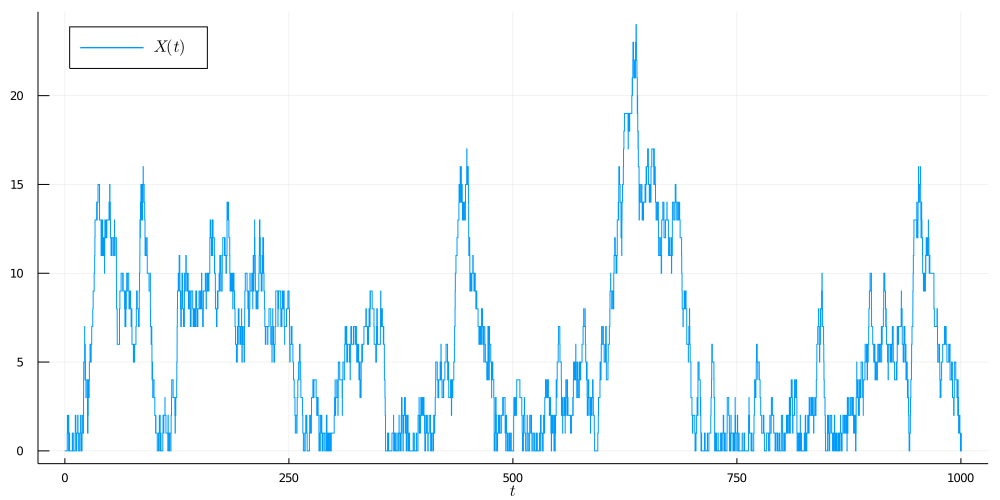

In [3]:
trabajos = Exponential(1.0)
lambda=0.9
Tfinal = 1000

rho = lambda * mean(trabajos)
println("Carga: $rho")

T,X,R = simula_MG1(lambda,trabajos,Tfinal);

plot(T,X,lt=:steppost, label=L"X(t)", legend=:topleft, xlabel=L"t")

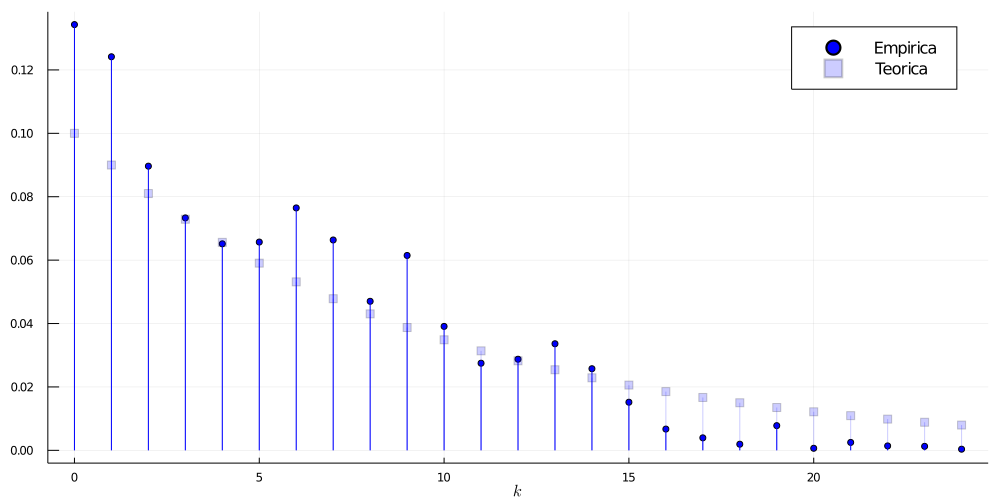

In [4]:
function ocupacion_empirica(T,X)
    
    kmax = maximum(X)
    
    k = (0:kmax)
    
    #aplico la misma funcion a cada j en k (comando map)
    p = map(j->sum((X[1:end-1].==j).*diff(T))/T[end],k)
    
    return k,p
end

k,p = ocupacion_empirica(T,X)

plot(k,p, lt=:stem, marker=:circle, color=:blue, label="Empirica", xlabel=L"k")
plot!(k,(1-rho)*rho.^k, lt=:stem, marker=:square, alpha=0.2, color=:blue, label="Teorica")

### Con distribución determinística ($M/D/1$)

Carga: 0.9


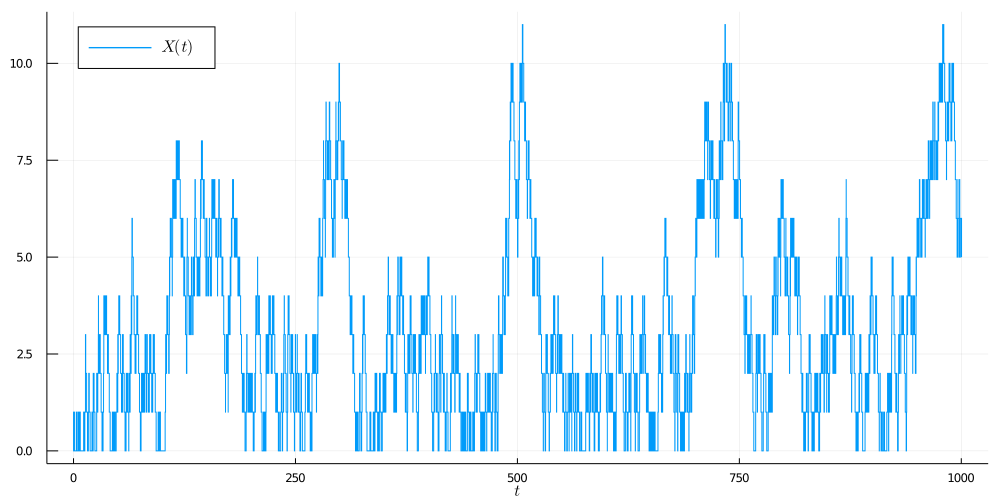

In [5]:
trabajos = Categorical(1.0) #una sola categoría, de tamaño 1
lambda=0.9
Tfinal = 1000

rho = lambda * mean(trabajos)
println("Carga: $rho")

T,X,R = simula_MG1(lambda,trabajos,Tfinal);

plot(T,X,lt=:steppost, label=L"X(t)", legend=:topleft, xlabel=L"t")

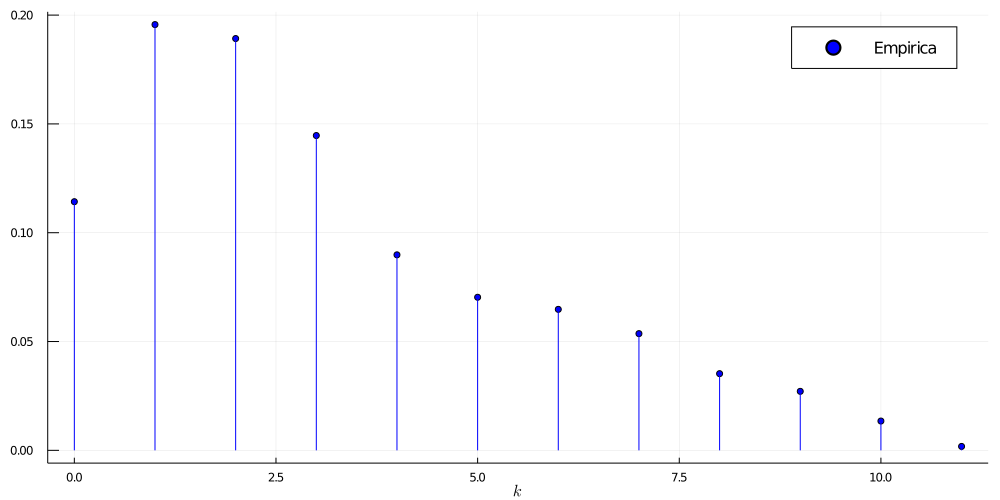

In [6]:

k,p = ocupacion_empirica(T,X)

plot(k,p, lt=:stem, marker=:circle, color=:blue, label="Empirica", xlabel=L"k")


### Con distribución Gamma

La distribución $\Gamma(\alpha,\theta)$ es una generalización de la exponencial, pero puede tener más o menos varianza que esta.

$$X\sim \Gamma(\alpha,\theta) \Rightarrow E[X] = \alpha \theta, \quad Var(X) = \alpha\theta^2.$$

Si $\alpha=1$, corresponde a la distribución exponencial de parámetro $\mu=1/\theta$. El coeficiente de variación es:

$$cv^2 = \frac{Var(X)}{E[X]^2} = \frac{\alpha \theta^2}{\alpha^2 \theta^2} = \frac{1}{\alpha}.$$

Por lo tanto, si $\alpha\gg 1$, es más concentrada, y si $\alpha\ll 1$, es más variable.

### Ejemplo

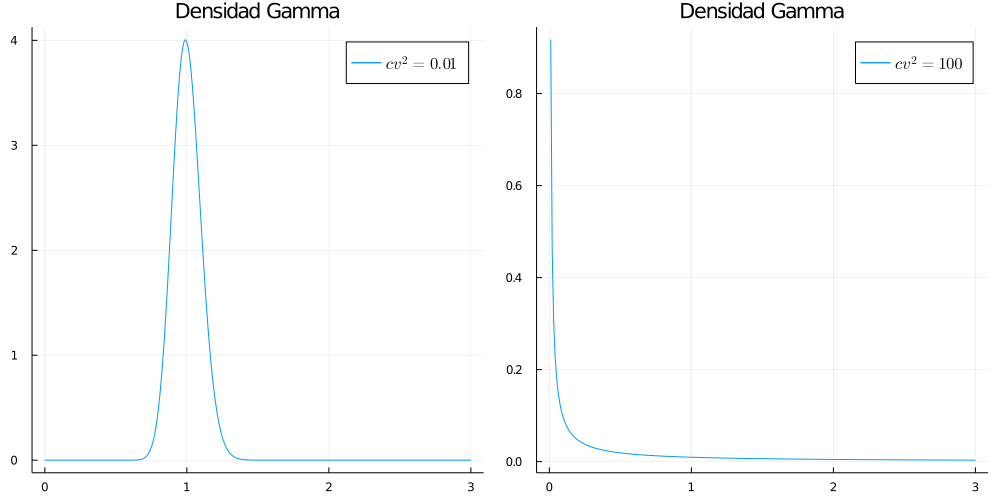

In [7]:
#Elegimos alpha y theta para que la media sea 1 como antes

d1 = Gamma(100,0.01)  #alpha 100, cv2 = 0.01
d2 = Gamma(0.01,100)  #alpha 0.01, cv2=100

x=(0.0:0.01:3)

plot(x,[pdf(d1,x), pdf(d2,x)], layout=2, label=[L"cv^2=0.01" L"cv^2=100"], title="Densidad Gamma")

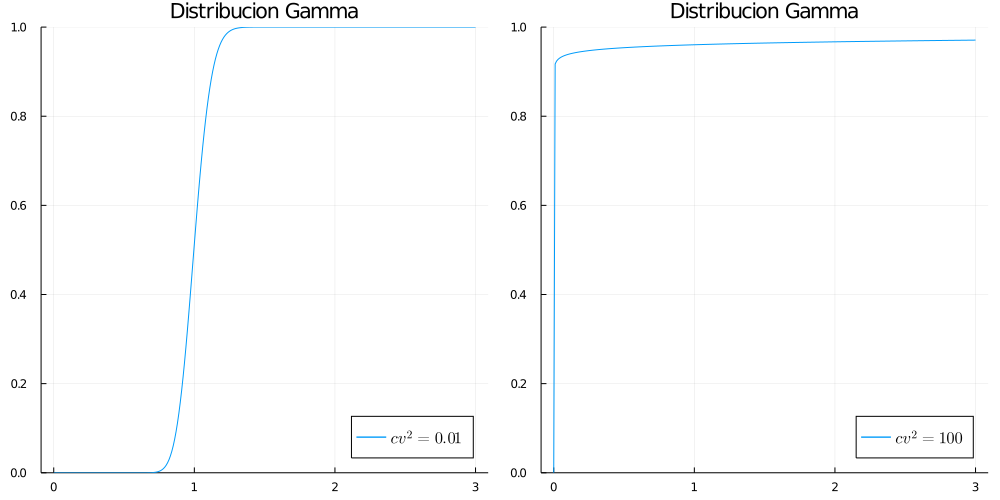

In [8]:
plot(x,[cdf(d1,x), cdf(d2,x)], layout=2, label=[L"cv^2=0.01" L"cv^2=100"], 
            title="Distribucion Gamma", ylim=(0,1), legend=:bottomright)

Cargas: 0.9, 0.9


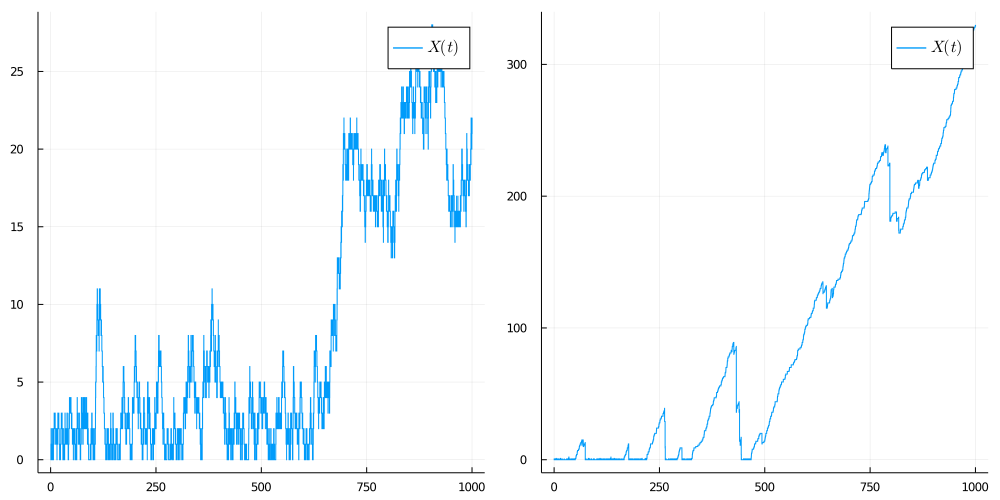

In [9]:
lambda=0.9
Tfinal = 1000
rho1=lambda*mean(d1)
rho2 = lambda*mean(d2)
println("Cargas: $rho1, $rho2")
T1,X1,R1  = simula_MG1(lambda,d1,Tfinal)
T2,X2,R2  = simula_MG1(lambda,d2,Tfinal)

plot([(T1,X1), (T2,X2)], layout=2, lt=:steppost, label=L"X(t)")

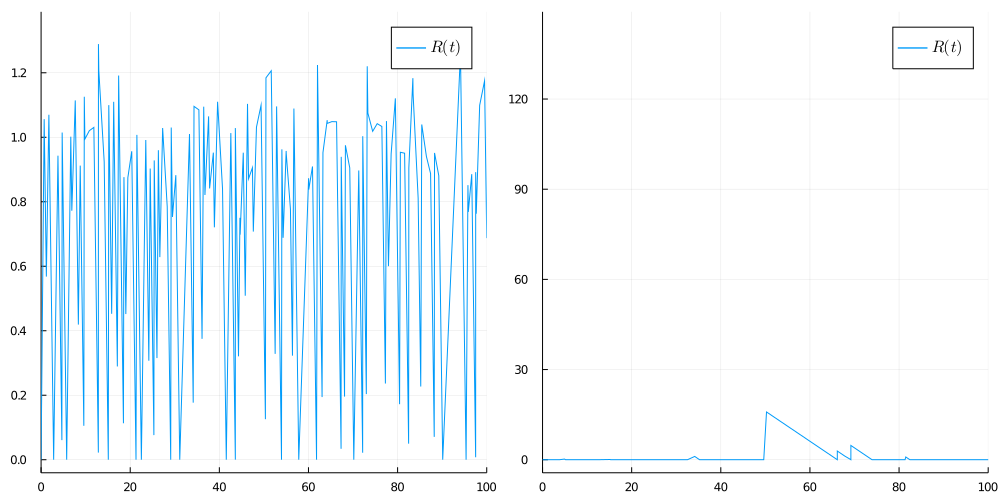

In [10]:
plot([(T1,R1), (T2,R2)], layout=2, label=L"R(t)", xlim=(0,100))

## Ejercicio: ¿Qué ocurre si cambiamos la disciplina?

Ajuste el código de simulación para analizar el comportamiento del sistema $M/G/1$ utilizando otras disciplinas. En particular:

1. LIFO preemptive: siempre se atiende al último que llega, interrumpiendo al que está en servicio.
2. Processor sharing: todos se atienden al mismo tiempo, repartiendo la capacidad.
3. SRPT: shortest remaining processing time. Siempre se atiende al que le falta menos trabajo.